# Duplicate Question Pair Recognizer using NLP

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

### Reading the dataset

In [2]:
new_df = pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')
new_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### Exploring the dataset

In [3]:
new_df.shape

(404351, 6)

In [4]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404350,404350,789800,789801,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
# Cheaking for missing values
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
# cheaking for duplicate rows
new_df.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64


<Axes: xlabel='is_duplicate', ylabel='count'>

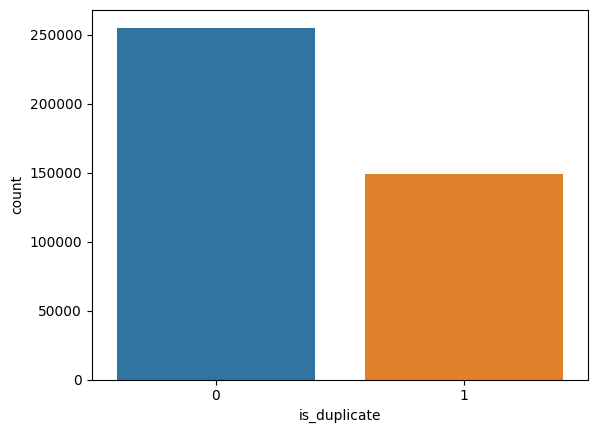

In [9]:
# Observing distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
sns.countplot(x='is_duplicate',data=new_df)

In [10]:
# Checking for repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print("Number of unique questions are :",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of repeated questions are :",x[x].shape[0])

Number of unique questions are : 789801
Number of repeated questions are : 13698


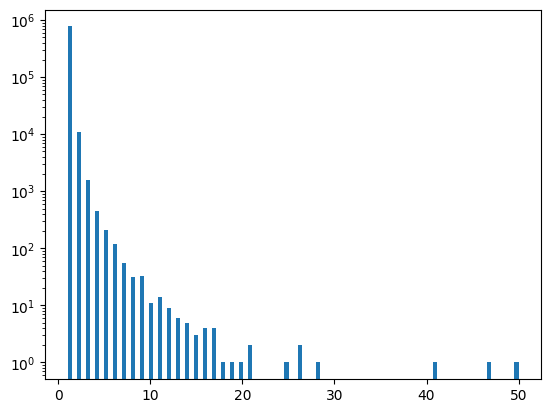

In [11]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

#### Preprocessing the dataset

In [12]:
import re
from bs4 import BeautifulSoup

In [13]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replacing special characters with string equivalents
    q = q.replace('%','percent')
    q = q.replace('$','dollar')
    q = q.replace('@','at')
    q = q.replace('₹','rupee')
    q = q.replace('€','euro')

    q = q.replace('[math]','')
    
    # Replacing dome numbers with string equivalents
    q = q.replace(',000,000,000','b')
    q = q.replace(',000,000','m')
    q = q.replace(',000','k')
    q = re.sub(r'([0-9]+)000000000',r'\1b',q)
    q = re.sub(r'([0-9]+)000000',r'\1m',q)
    q = re.sub(r'([0-9]+)000',r'\1k',q)

    # Decontracting words
    contractions_dict = {
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "i'm": "I am",
        "isn't": "is not",
        "let's": "let us",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "shouldn't": "should not",
        "they're": "they are",
        "wasn't": "was not",
        "we're": "we are",
        "weren't": "were not",
        "what's": "what is",
        "who's": "who is",
        "won't": "will not",
        "wouldn't": "would not",
        "you're": "you are",
        "you've": "you have",
        "i've": "I have",
        "we've": "we have",
        "they've": "they have",
        "he'd": "he would",
        "he'll": "he will",
        "we'll": "we will",
        "they'll": "they will",
        "I'd": "I would",
        "I'll": "I will",
        "there's": "there is",
        "that’s": "that is",
        "who'd": "who would",
        "who'll": "who will",
        "it'll": "it will",
        "you'd": "you would",
        "weren't": "were not",
        "we'd": "we would",
        "they'd": "they would",
        "isn't": "is not",
        "could've": "could have",
        "should've": "should have",
        "would've": "would have",
        "might've": "might have",
        "must've": "must have",
        "she's": "she has",
        "he's": "he has",
        "it's": "it has"
    }

    decontracted_words = []
    for word in q.split():
        if word in contractions_dict:
            word = contractions_dict[word]

        decontracted_words.append(word)

    q = ' '.join(decontracted_words)
    q = q.replace("'ve","have")
    q = q.replace("n't","not")
    q = q.replace("'re","are")
    q = q.replace("'ll","will")

    # Removing html tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Removing punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern,' ',q).strip()

    return q


In [14]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [16]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [17]:
new_df['que1_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['que2_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,que1_words,que2_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7


In [18]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

new_df['words_common'] = new_df.apply(common_words,axis=1)

In [19]:
def total_word(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

new_df['word_total'] = new_df.apply(total_word,axis=1)

In [20]:
new_df['word_share'] = round(new_df['words_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,que1_words,que2_words,words_common,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26,0.31
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,1,22,0.05
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4,21,0.19


In [21]:
# token features
from nltk.corpus import stopwords

def fectch_token_feature(row):
    q1 = row['question1']
    q2 = row['question2']

    safe_div = 0.0001
    stop_words = stopwords.words('english')
    token_feature = [0.0]*8

    # converting sentence to token
    q1_token = q1.split()
    q2_token = q2.split()

    if len(q1_token)==0 or len(q2_token)==0:
        return token_feature

    # Getting the non-stopwords
    q1_words = set([word for word in q1_token if word not in stop_words])
    q2_words = set([word for word in q2_token if word not in stop_words])

    # Getting the stopwords
    q1_stops = set([word for word in q1_token if word in stop_words])
    q2_stops = set([word for word in q2_token if word in stop_words])

    # Getting the common non-stopwords
    common_word_count = len(q1_words.intersection(q2_words))

    # Getting the common stopwords
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Getting the common tokens
    common_token_count = len(set(q1_token).intersection(set(q2_token)))

    token_feature[0] = common_word_count/(min(len(q1_words),len(q2_words)) + safe_div)
    token_feature[1] = common_word_count/(max(len(q1_words),len(q2_words)) + safe_div)
    token_feature[2] = common_stop_count/(min(len(q1_stops),len(q2_stops)) + safe_div)
    token_feature[3] = common_stop_count/(max(len(q1_stops),len(q2_stops)) + safe_div)
    token_feature[4] = common_token_count/(min(len(q1_token),len(q2_token)) + safe_div)
    token_feature[5] = common_token_count/(max(len(q1_token),len(q2_token)) + safe_div)

    # Checking the last words of both the questions are same or not
    token_feature[6] = int(q1_token[-1]==q2_token[-1])

    # checking if first word of both the questions are same or not
    token_feature[7] = int(q1_token[0]==q2_token[0])

    return token_feature

In [22]:
token_features = new_df.apply(fectch_token_feature,axis=1)

new_df['cwc_min'] = list(map(lambda x: x[0], token_features))
new_df['cwc_max'] = list(map(lambda x: x[1], token_features))
new_df['csc_min'] = list(map(lambda x: x[2], token_features))
new_df['csc_max'] = list(map(lambda x: x[3], token_features))
new_df['ctc_mix'] = list(map(lambda x: x[4], token_features))
new_df['ctc_max'] = list(map(lambda x: x[5], token_features))
new_df['last_word_eq'] = list(map(lambda x: x[6], token_features))
new_df['first_word_eq'] = list(map(lambda x: x[7], token_features))

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,que1_words,que2_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_mix,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,26,0.31,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,...,22,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,21,0.19,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0


In [24]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=0956be7d3211813ae2962cae0e83a855c170fa9d685ed1dbc4bc47f0a0785ac2
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [25]:
# length features
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_feature = [0.0]*3

    # converting sentence to token
    q1_token = q1.split()
    q2_token = q2.split()

    if len(q1_token)==0 or len(q2_token)==0:
        return length_feature

    # average token length of both the question
    length_feature[0] = (len(q1_token) + len(q2_token))/2

    # absolute token length difference
    length_feature[1] = abs(len(q1_token) - len(q2_token))

    # longest substring ratio
    strs = list(distance.lcsubstrings(q1,q2))
    length_feature[2] = len(strs[0])/(min(len(q1),len(q2))+1) if strs else 0

    return length_feature

In [26]:
length_features = new_df.apply(fetch_length_features,axis=1)

new_df['mean_length'] = list(map(lambda x: x[0],length_features))
new_df['abs_len_diff'] = list(map(lambda x: x[1],length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2],length_features))

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,que1_words,que2_words,...,cwc_max,csc_min,csc_max,ctc_mix,ctc_max,last_word_eq,first_word_eq,mean_length,abs_len_diff,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,13.0,2.0,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,12.5,5.0,0.588235
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,12.0,4.0,0.169492
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.5,1.0,0.040000
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,10.0,6.0,0.153846


In [28]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Fuzzy Features

from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)

    # fuzz partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

    # token sort ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

    # token set ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

In [30]:
fuzzy_feature = new_df.apply(fetch_fuzzy_features,axis=1)

new_df['fuzz_ratio'] = list(map(lambda x: x[0],fuzzy_feature))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1],fuzzy_feature))
new_df['token_sort_ratio'] = list(map(lambda x: x[2],fuzzy_feature))
new_df['token_set_ratio'] = list(map(lambda x: x[3],fuzzy_feature))

In [31]:
new_df.shape

(404351, 28)

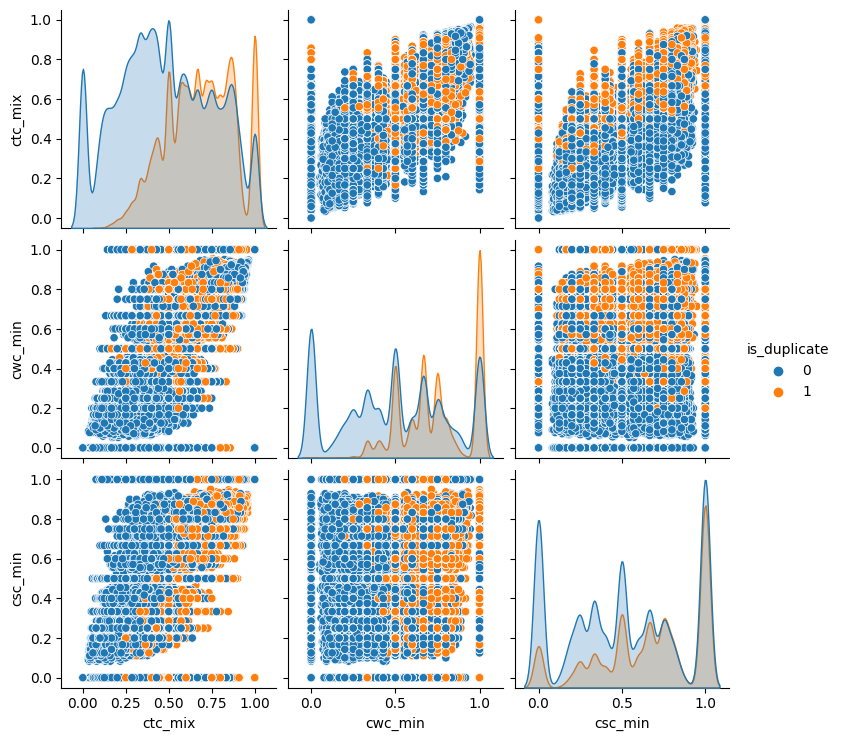

In [32]:
sns.pairplot(new_df[['ctc_mix','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

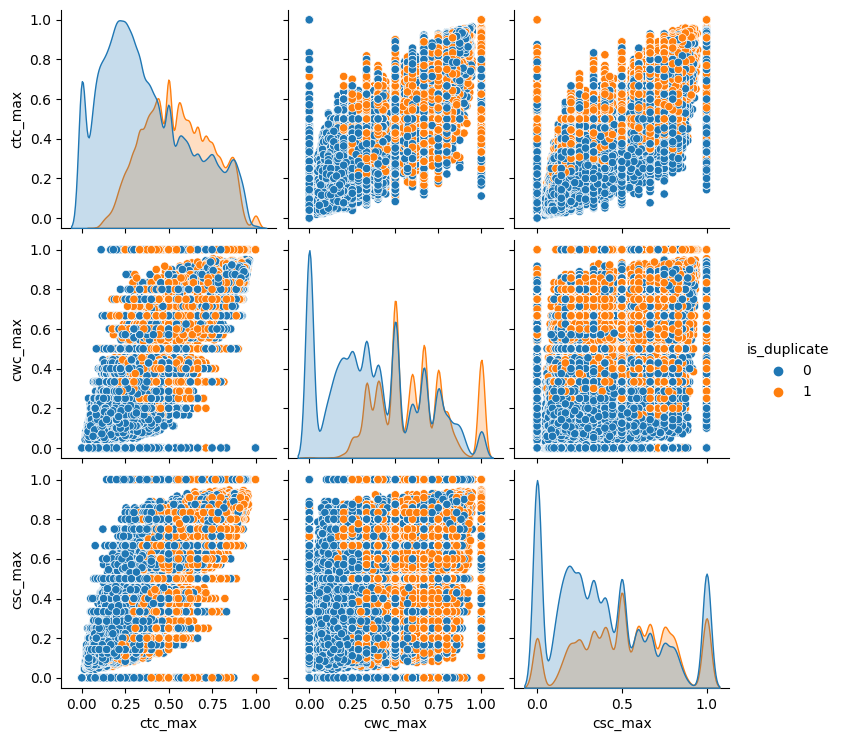

In [33]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

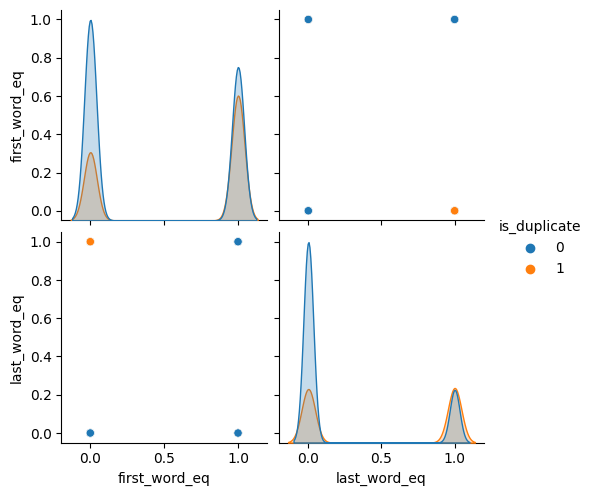

In [34]:
sns.pairplot(new_df[['first_word_eq','last_word_eq','is_duplicate']],hue='is_duplicate')

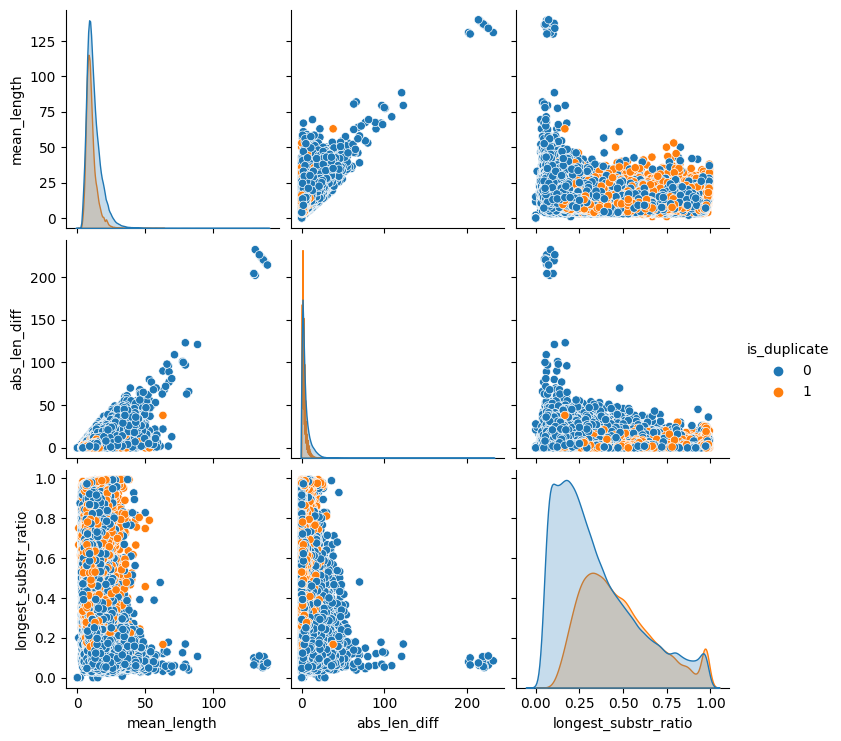

In [35]:
sns.pairplot(new_df[['mean_length','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

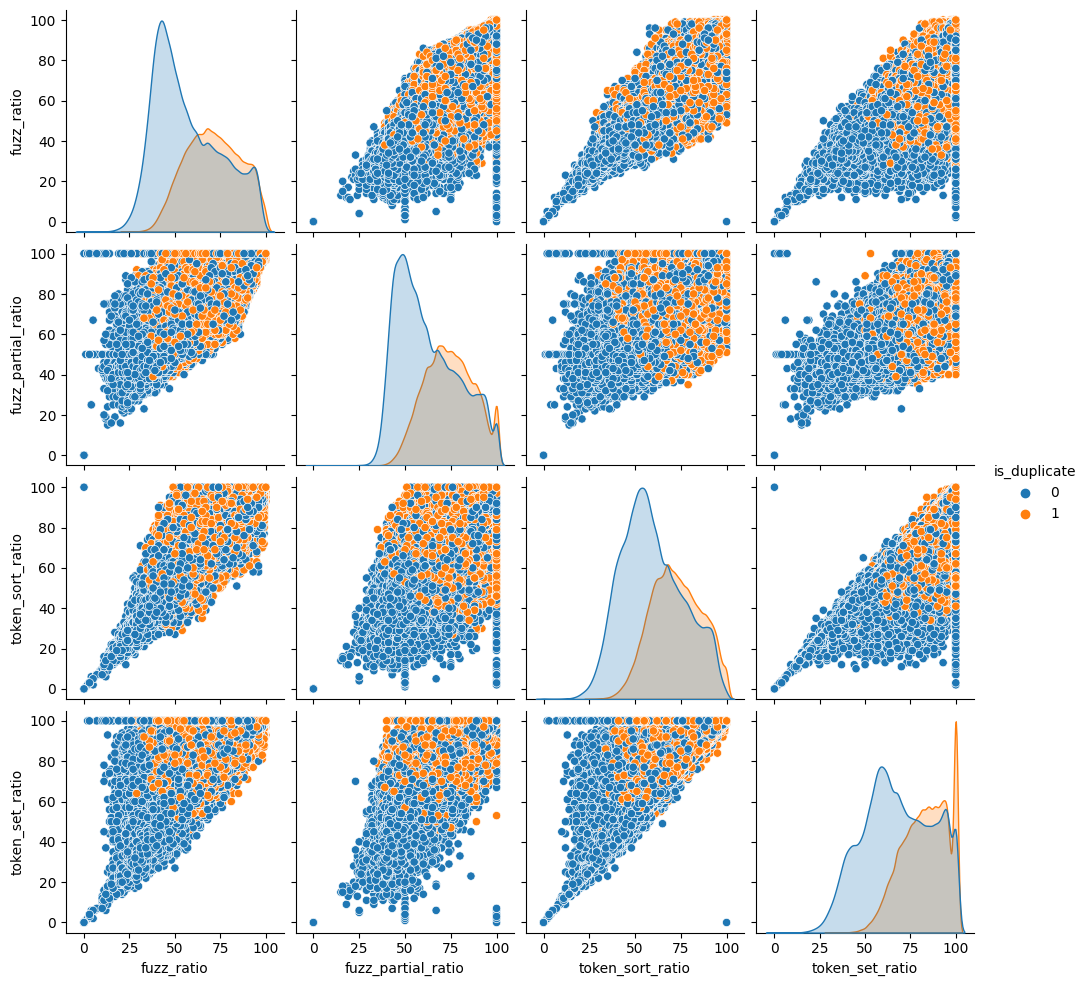

In [36]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [37]:
# using TSNE for dimentionality reduction for the 11 advanced features
from sklearn.preprocessing import MinMaxScaler

# Normalize selected features
features = ['ctc_mix', 'cwc_min', 'csc_min', 'ctc_max', 'cwc_max', 'csc_max', 
            'first_word_eq', 'last_word_eq', 'mean_length', 'abs_len_diff', 
            'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 
            'token_sort_ratio', 'token_set_ratio']

x = MinMaxScaler().fit_transform(new_df[features])
y = new_df['is_duplicate'].values

In [38]:
from sklearn.manifold import TSNE

#tsne2d = TSNE(
#    n_components=2,
#    init='random',
#   random_state=101,
#   method='barnes_hut',
#   n_iter=1000,
#   verbose=2,
#   angle=0.5
#).fit_transform(x)

In [39]:
# Apply t-SNE for dimensionality reduction
tsne2d = TSNE(n_components=2, init='random', random_state=101, method='barnes_hut', 
              n_iter=700, verbose=2, angle=0.5).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404351 samples in 1.147s...
[t-SNE] Computed neighbors for 404351 samples in 345.841s...
[t-SNE] Computed conditional probabilities for sample 1000 / 404351
[t-SNE] Computed conditional probabilities for sample 2000 / 404351
[t-SNE] Computed conditional probabilities for sample 3000 / 404351
[t-SNE] Computed conditional probabilities for sample 4000 / 404351
[t-SNE] Computed conditional probabilities for sample 5000 / 404351
[t-SNE] Computed conditional probabilities for sample 6000 / 404351
[t-SNE] Computed conditional probabilities for sample 7000 / 404351
[t-SNE] Computed conditional probabilities for sample 8000 / 404351
[t-SNE] Computed conditional probabilities for sample 9000 / 404351
[t-SNE] Computed conditional probabilities for sample 10000 / 404351
[t-SNE] Computed conditional probabilities for sample 11000 / 404351
[t-SNE] Computed conditional probabilities for sample 12000 / 404351
[t-SNE] Computed conditional proba

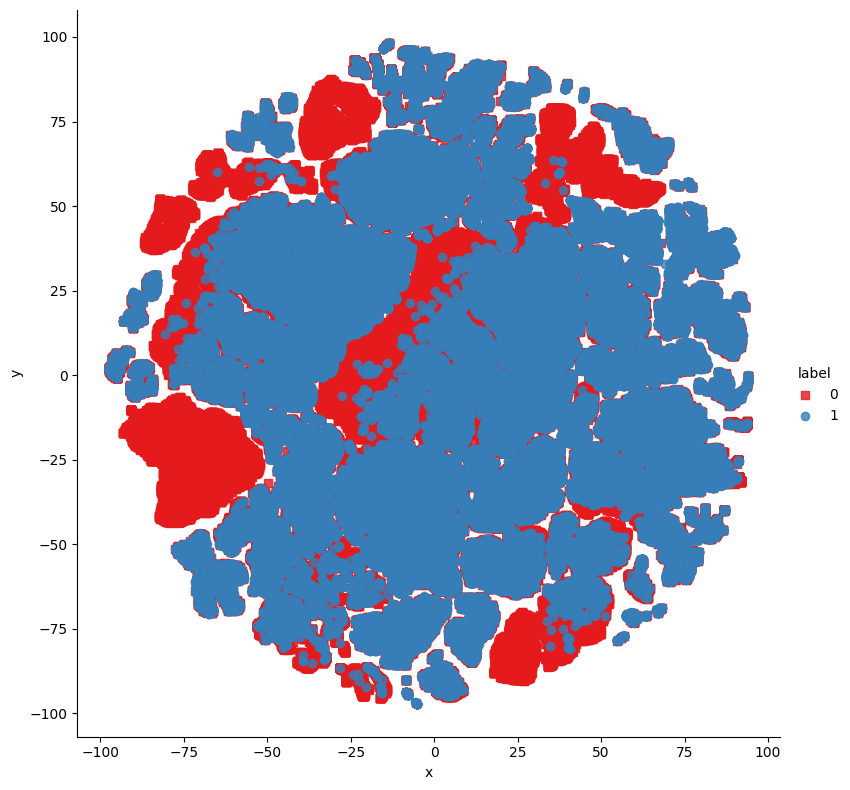

In [40]:
# Create a DataFrame for visualization
x_df = pd.DataFrame({'x': tsne2d[:, 0], 'y': tsne2d[:, 1], 'label': y})

# Plot using seaborn
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s', 'o'])

In [41]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [42]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(404351, 23)


,is_duplicate,q1_len,q2_len,que1_words,que2_words,words_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,mean_length,abs_len_diff,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.785709,0.0,1.0,13.0,2.0,0.982456,93,100,93,100
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,...,0.466664,0.0,1.0,12.5,5.0,0.588235,66,74,63,86
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0.285712,0.0,1.0,12.0,4.0,0.169492,54,53,66,66
3,0,49,58,12,16,1,22,0.05,0.000000,0.000000,...,0.000000,0.0,0.0,11.5,1.0,0.040000,36,39,37,36
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,...,0.307690,0.0,1.0,10.0,6.0,0.153846,46,55,47,67


In [43]:
#from sklearn.feature_extraction.text import CountVectorizer

In [44]:

#question = list(ques_df['question1']) + list(ques_df['question2'])

#cv = CountVectorizer(max_features=3000)
#q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [45]:
from gensim.models import Word2Vec

In [46]:
# Combine questions from the two columns
question = list(ques_df['question1']) + list(ques_df['question2'])

# Tokenize the sentences into words
question_tokens = [q.split() for q in question]

# Train the Word2Vec model
w2v_model = Word2Vec(question_tokens, vector_size=600, window=5, min_count=1, workers=4)

In [47]:
def sentence_to_vector(sentence, model, vector_size):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Convert questions to vectors
q1_arr = np.array([sentence_to_vector(q, w2v_model, 600) for q in ques_df['question1']])
q2_arr = np.array([sentence_to_vector(q, w2v_model, 600) for q in ques_df['question2']])

In [48]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(404351, 1200)

In [49]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(404351, 1223)


,is_duplicate,q1_len,q2_len,que1_words,que2_words,words_common,word_total,word_share,cwc_min,cwc_max,...,590,591,592,593,594,595,596,597,598,599
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,-0.134918,0.092682,0.085872,0.088287,-0.043544,0.103416,0.021333,-0.059425,0.458488,-0.412070
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,...,-0.286737,0.025873,0.350485,0.024455,-0.015178,-0.012210,0.040270,-0.102228,0.349794,-0.310417
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,-0.046325,0.092657,0.226396,0.296643,-0.156304,0.235086,0.042751,0.376769,0.208916,-0.118804
3,0,49,58,12,16,1,22,0.05,0.000000,0.000000,...,-0.120082,0.100318,-0.246744,-0.379881,0.007308,0.091108,-0.085613,0.228249,0.057745,-0.027446
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,...,-0.147890,-0.035375,0.049981,-0.405277,-0.019447,0.166205,-0.070466,-0.009529,0.387276,0.171383


In [50]:
x = final_df.drop(['is_duplicate'],axis=1)
y = final_df['is_duplicate']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [52]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8311384798011648

In [54]:
x_train = x_train.values if hasattr(x_train, 'values') else x_train
x_test = x_test.values if hasattr(x_test, 'values') else x_test
y_train = y_train.values if hasattr(y_train, 'values') else y_train
y_test = y_test.values if hasattr(y_test, 'values') else y_test

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred2 = xgb.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8252154666073129

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
# for Random Forest
confusion_matrix(y_test,y_pred)

array([[45005,  5993],
       [ 7663, 22210]])

In [58]:
# fOR XG Boost
confusion_matrix(y_test,y_pred2)

array([[44147,  6851],
       [ 7284, 22589]])

In [59]:
def common_word(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(),q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),q2.split(" ")))
    return len(w1 & w2)

In [60]:
def total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(),q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),q2.split(" ")))
    return (len(w1) + len(w2))

In [61]:
def fetch_token_feature(q1,q2):
    safe_div = 0.0001
    stop_words = stopwords.words('english')
    token_feature = [0.0]*8

    # converting sentence to token
    q1_token = q1.split()
    q2_token = q2.split()

    if len(q1_token)==0 or len(q2_token)==0:
        return token_feature

    # Getting the non-stopwords
    q1_words = set([word for word in q1_token if word not in stop_words])
    q2_words = set([word for word in q2_token if word not in stop_words])

    # Getting the stopwords
    q1_stops = set([word for word in q1_token if word in stop_words])
    q2_stops = set([word for word in q2_token if word in stop_words])

    # Getting the common non-stopwords
    common_word_count = len(q1_words.intersection(q2_words))

    # Getting the common stopwords
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Getting the common tokens
    common_token_count = len(set(q1_token).intersection(set(q2_token)))

    token_feature[0] = common_word_count/(min(len(q1_words),len(q2_words)) + safe_div)
    token_feature[1] = common_word_count/(max(len(q1_words),len(q2_words)) + safe_div)
    token_feature[2] = common_stop_count/(min(len(q1_stops),len(q2_stops)) + safe_div)
    token_feature[3] = common_stop_count/(max(len(q1_stops),len(q2_stops)) + safe_div)
    token_feature[4] = common_token_count/(min(len(q1_token),len(q2_token)) + safe_div)
    token_feature[5] = common_token_count/(max(len(q1_token),len(q2_token)) + safe_div)

    # Checking the last words of both the questions are same or not
    token_feature[6] = int(q1_token[-1]==q2_token[-1])

    # checking if first word of both the questions are same or not
    token_feature[7] = int(q1_token[0]==q2_token[0])

    return token_feature

In [62]:
def fetchs_length_features(q1,q2):
    length_feature = [0.0]*3

    # converting sentence to token
    q1_token = q1.split()
    q2_token = q2.split()

    if len(q1_token)==0 or len(q2_token)==0:
        return length_feature

    # average token length of both the question
    length_feature[0] = (len(q1_token) + len(q2_token))/2

    # absolute token length difference
    length_feature[1] = abs(len(q1_token) - len(q2_token))

    # longest substring ratio
    strs = list(distance.lcsubstrings(q1,q2))
    length_feature[2] = len(strs[0])/(min(len(q1),len(q2))+1)

    return length_feature

In [63]:
def fetchs_fuzzy_features(q1,q2):
    fuzzy_features = [0.0]*4

    # fuzz ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)

    # fuzz partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

    # token sort ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

    # token set ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

In [64]:
def query_point_creator(q1,q2):
    input_query = []

    # preprocessing
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetching basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(common_word(q1,q2))
    input_query.append(total_words(q1,q2))
    input_query.append(round(common_word(q1,q2)/total_words(q1,q2),2))

    # fetch token features
    token_features = fetch_token_feature(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = fetchs_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = fetchs_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow for q1
    q1_bow = np.array([sentence_to_vector(q1, w2v_model, 600)])

    # bow for q2
    q2_bow = np.array([sentence_to_vector(q2, w2v_model, 600)])

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [70]:
q1 = 'Where is the capital of India?'
q2 = 'What is the capital of India?'
rfc.predict(query_point_creator(q1,q2))

array([1])

In [67]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of China?'
rfc.predict(query_point_creator(q1,q2))

array([0])

In [68]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of China?'
xgb.predict(query_point_creator(q1,q2))

array([0])

In [69]:
q1 = "How does machine learning work?"
q2 = "Explain the working of a washing machine."
rfc.predict(query_point_creator(q1,q2))

array([0])

In [74]:
q1 = "What is the best way to learn programming?"
q2 = "How should I start learning programming?"
rfc.predict(query_point_creator(q1,q2))

array([1])